In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Checking NULL values

In [190]:
dataset.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [191]:
dataset.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# Ploting some graphs

<BarContainer object of 200 artists>

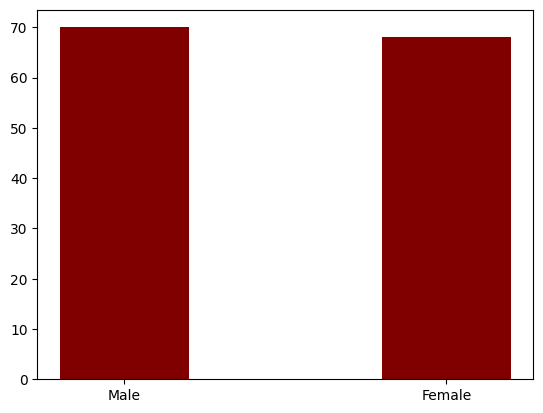

In [192]:
plt.bar(dataset['Genre'], dataset['Age'], color='maroon', width=0.4)

<BarContainer object of 200 artists>

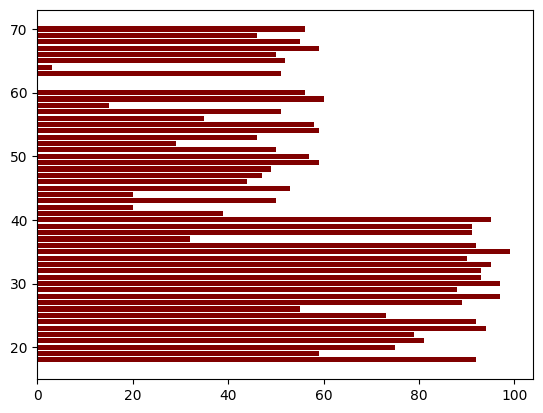

In [193]:
plt.barh(dataset['Age'], dataset['Spending Score (1-100)'], color='maroon')

<BarContainer object of 200 artists>

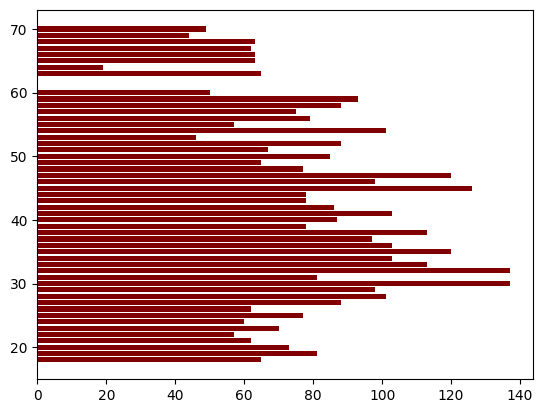

In [194]:
plt.barh(dataset['Age'], dataset['Annual Income (k$)'], color='maroon')

([<matplotlib.patches.Wedge at 0x3044cbc50>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')])

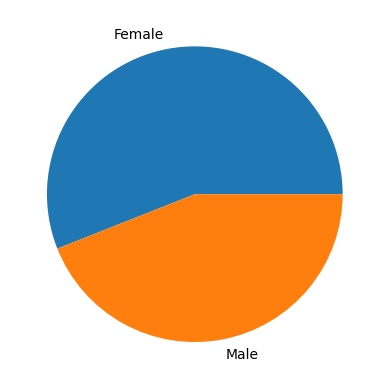

In [195]:
freq = dataset['Genre'].value_counts()
plt.pie(freq.values, labels=freq.index)

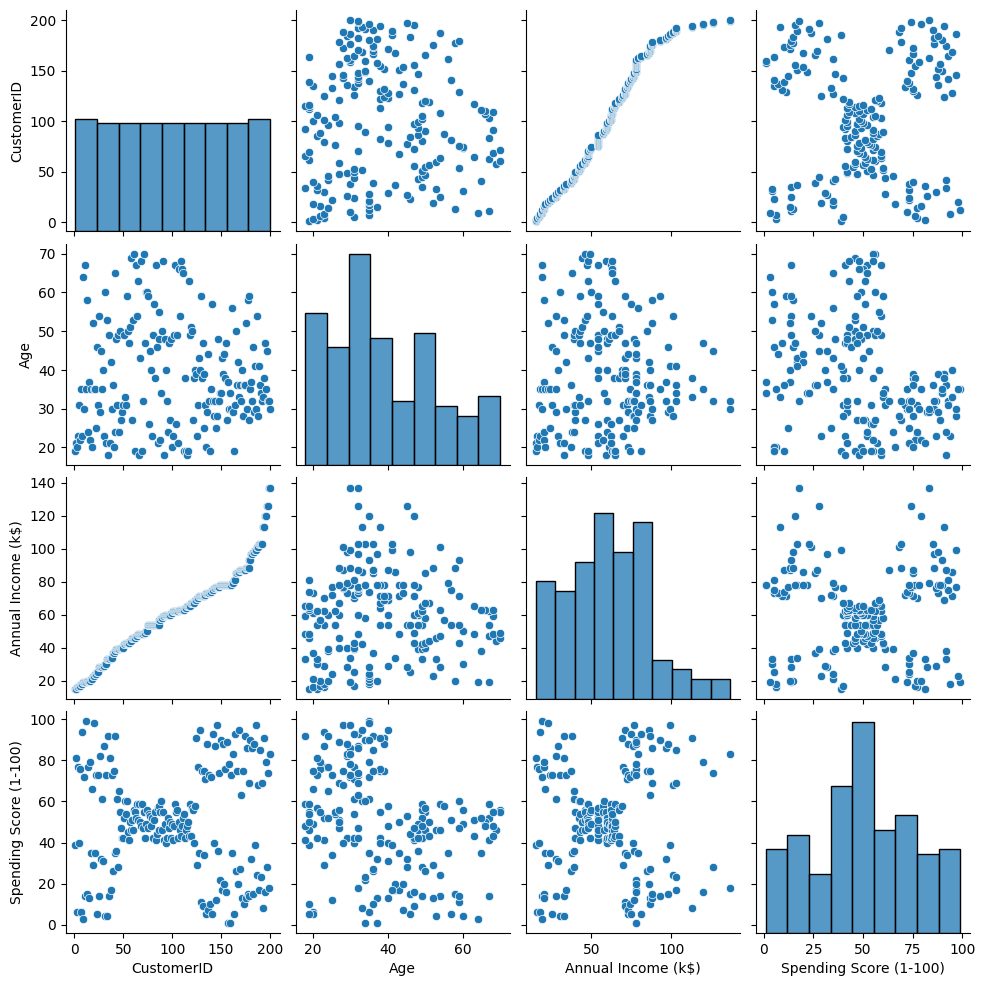

In [196]:
sns.pairplot(dataset)

<Axes: title={'center': 'Unclustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

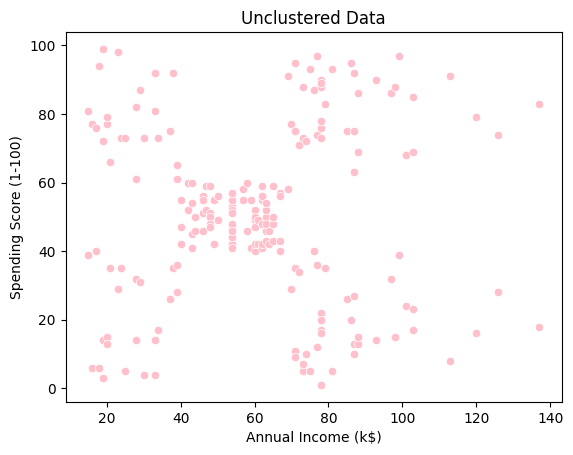

In [197]:
plt.title("Unclustered Data")
sns.scatterplot(x=dataset['Annual Income (k$)'], y=dataset['Spending Score (1-100)'], color='pink')

# Making imp changes

#### 1. Drop the customer_id column
#### 2. Label Encode the Gender column

In [198]:
#dataset.drop('CustomerID', axis=1, inplace=True)
#dataset

In [199]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['Genre'] = le.fit_transform(dataset['Genre'])       # Male->1, Female->0

In [200]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


# K-Means clustering

In [201]:
from sklearn.cluster import KMeans

X = dataset.iloc[:,3:]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [202]:
model =  KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [203]:
preds = model.predict(X)
preds

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

## Displaying inertia of model

# Displaying model's inertia

In [204]:
model.inertia_

132513.8966507177

# Silhouette_score

In [205]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, preds)
score

0.36175105311234446

In [206]:
inertia = []
for i in range(2,16):
    model = KMeans(n_clusters=i)
    model.fit(X)

    inertia.append(model.inertia_)

inertia

[184609.98434090614,
 106348.37306211119,
 82443.04256024679,
 44448.45544793371,
 38797.9027638142,
 32201.16657786658,
 27463.775454736748,
 22865.35222096744,
 20283.330767420986,
 17996.679272558322,
 18976.12903074902,
 16361.756702153003,
 14544.942127295362,
 13373.305416418207]

# Ploting graph of SSE scores

Text(0, 0.5, 'Inertia')

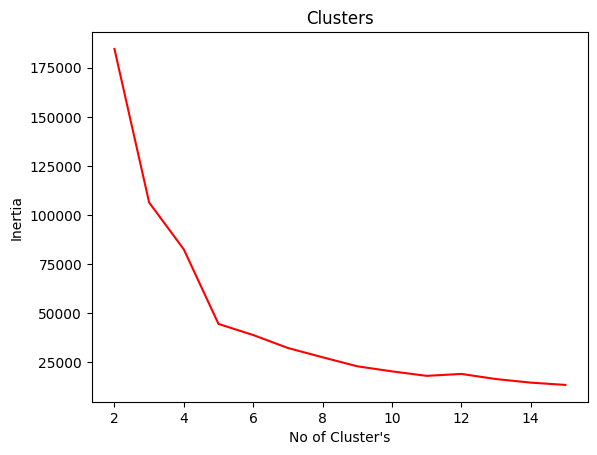

In [207]:
plt.title("Clusters")
sns.lineplot(x = range(2,16), y=inertia, color='red')
plt.xlabel("No of Cluster's")
plt.ylabel("Inertia")

In [208]:
sil = []

for i in range(2,16):
    model = KMeans(n_clusters=i)
    model.fit(X)
    preds = model.predict(X)
    score = silhouette_score(X, preds)
    sil.append(score)

sil

[0.29936152451888626,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.45705720010448403,
 0.5091985443862125,
 0.4539012098597153,
 0.4571957283008456,
 0.42802075809125767,
 0.4269902325141686,
 0.4218189557668948,
 0.40857029125984085,
 0.37802626278915413,
 0.4096736453010584]

Text(0, 0.5, 'Silhoutte Score')

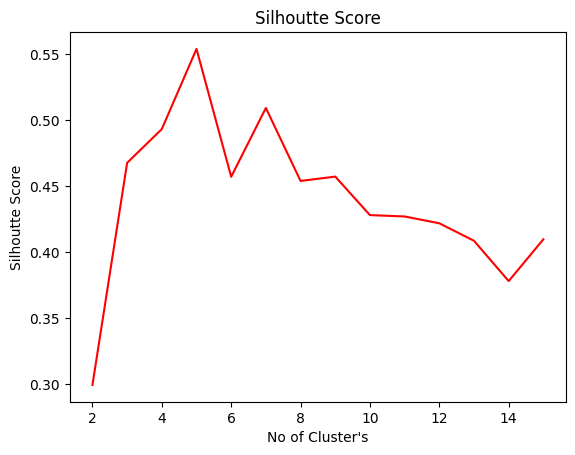

In [209]:
plt.title("Silhoutte Score")
sns.lineplot(x = range(2,16), y=sil, color='red')
plt.xlabel("No of Cluster's")
plt.ylabel("Silhoutte Score")

Text(0, 0.5, 'Silhoutte Score')

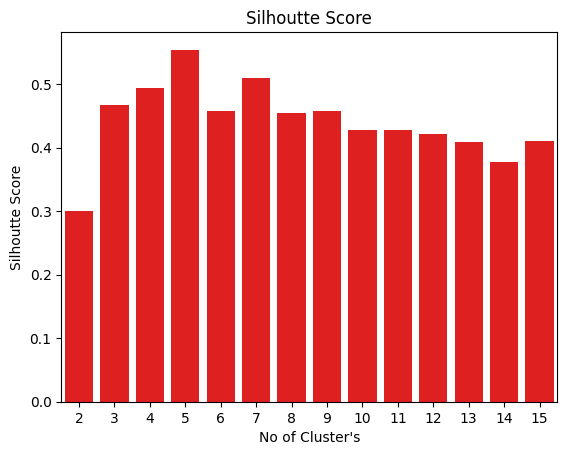

In [210]:
plt.title("Silhoutte Score")
sns.barplot(x = range(2,16), y=sil, color='red')
plt.xlabel("No of Cluster's")
plt.ylabel("Silhoutte Score")

# Building and training the model

In [211]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.2)

len(X_train), len(X_test)

(160, 40)

In [212]:
model = KMeans(n_clusters=5)
model.fit(X_train)

KMeans(n_clusters=5)

In [220]:
train_preds = model.predict(X_train)

test_preds = model.predict(X_test)
test_preds

array([1, 1, 2, 1, 2, 1, 3, 0, 1, 2, 2, 3, 1, 3, 3, 2, 1, 3, 1, 3, 1, 1,
       4, 4, 4, 3, 1, 3, 2, 1, 1, 3, 4, 3, 1, 2, 4, 3, 1, 1], dtype=int32)

In [221]:
model.inertia_

35080.691558441555

In [222]:
score = silhouette_score(X_test, test_preds)
score

0.47302094709585196

# Finding out centers of the clusters

In [223]:
centers = model.cluster_centers_
centers

array([[25.19047619, 79.57142857],
       [54.6969697 , 49.75757576],
       [90.28571429, 18.17857143],
       [90.        , 81.35714286],
       [25.        , 19.        ]])

# Ploting the Final Plot

In [224]:
X_train.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

<Axes: title={'center': 'Clustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

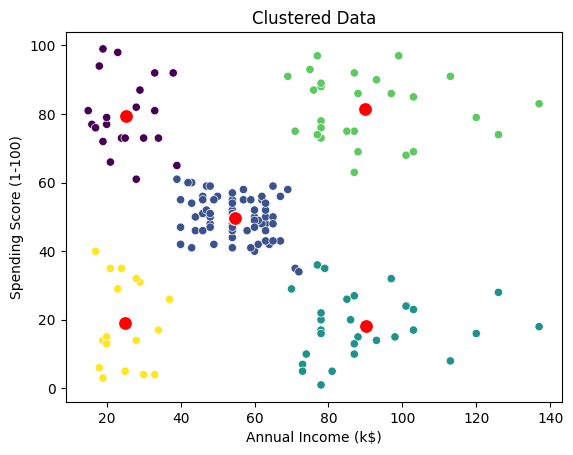

In [227]:
plt.title("Clustered Data")
sns.scatterplot(x=X_train['Annual Income (k$)'], y=X_train['Spending Score (1-100)'], c=train_preds)
sns.scatterplot(x=centers[:,0], y=centers[:,1], s=100, color='red')

# Agglomerative Clustering

In [230]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5)

cluster = model.fit(X_train)

In [231]:
train_preds = cluster.labels_
train_preds

array([3, 1, 0, 3, 0, 4, 2, 1, 1, 1, 0, 4, 1, 1, 1, 4, 3, 0, 1, 0, 1, 4,
       3, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 4, 1, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 0, 3, 0, 0, 1, 2, 3, 3, 1, 1, 1, 4, 2, 1, 1, 4, 1, 1, 1, 3,
       3, 0, 3, 4, 3, 0, 3, 4, 3, 0, 0, 4, 3, 1, 0, 1, 3, 3, 1, 0, 4, 2,
       1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 1, 1, 3, 4, 0, 3, 1,
       3, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 2, 4, 1, 2, 4, 0, 1, 1, 2, 1, 3,
       1, 1, 0, 1, 4, 4])

In [232]:
sil = silhouette_score(X_train, train_preds)
sil

0.5692762138067956

In [233]:
cluster = model.fit(X_test)

test_preds = cluster.labels_
test_preds

array([4, 4, 2, 4, 2, 4, 1, 4, 0, 2, 2, 1, 0, 1, 1, 2, 4, 1, 4, 1, 4, 0,
       3, 3, 3, 1, 3, 1, 0, 0, 4, 1, 3, 1, 0, 2, 3, 1, 0, 0])

<Axes: title={'center': 'Clustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

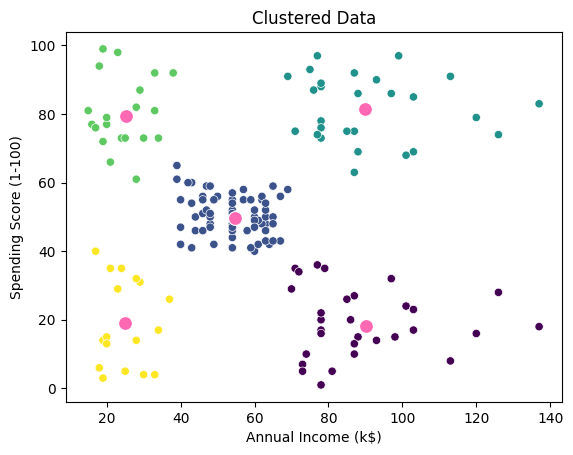

In [237]:
plt.title("Clustered Data")
sns.scatterplot(x = X_train['Annual Income (k$)'] , y = X_train['Spending Score (1-100)'] , c = train_preds)
sns.scatterplot(x = centers[:,0] , y = centers[:,1] , s=100 , color = 'hotpink')